# The 1987-2003 US Flights Performance Analysis
## by Saydobid Khusanov

## Investigation Overview

In this investigation, total flight occurrences of the 1987-2008 US flights and their distributions were analysed among the travel distances, cancellation reasons and delay types. Total flight occurrences were analysed with the relative frequency to gain more valuable insights. It was also intended to identify the most common flight delays with their corresponding durations.

## Dataset Overview

This analysis is based on the 1987-2008 US flights performance data. It consists of flight arrival and departure details for all commercial flights within the USA, from October 1987 to April 2008. 100K rows were randomly selected from each of the year-based datasets. The data types of the time-related columns were corrected.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv("../data/merged_data.csv")

## Most Common Flight Months

As the dataset of interest was a sample of the population, using the relative frequency provided more reasonable insights. The numeric values of the bar chart are displayed in proportions relative to the total amount. It can be seen that most of the flights occurred between October and December while the summer months contained the lowest ones. It is worth noting that all proportions are close to each other lying between the range of 0.07 and 0.10.

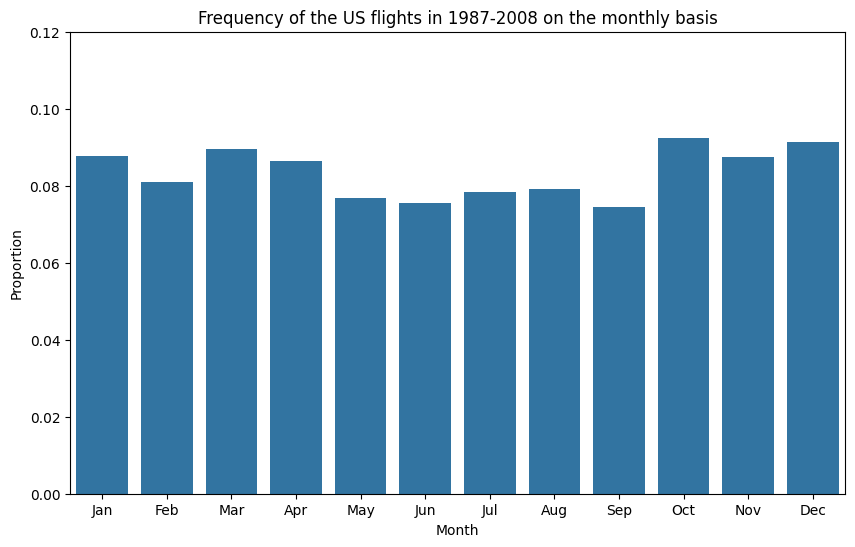

In [3]:
# get the mount count
month_count = df['Month'].value_counts().sort_index()
month_labels = month_count.index

# calculate the relative frequency
month_total = month_count.sum()

max_value = month_count.values[0] / month_total

tick_props = np.arange(0, max_value + 0.04, 0.02)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

import calendar
# get month labels
abbr_month = [calendar.month_abbr[label] for label in month_labels.values]

base_color = sb.color_palette()[0]

# set the figure size
plt.figure(figsize=(10, 6))

# seaborn countplot
sb.countplot(data=df, x="Month", color=base_color, order=month_labels)

plt.title("Frequency of the US flights in 1987-2008 on the monthly basis")

# set the custom ticks
plt.yticks(tick_props * month_total, tick_names)
plt.xticks(np.arange(0, 12, 1), abbr_month)

plt.ylabel("Proportion");

## Flight Distances Distribution

Due to the increased number of outliers, applying logarithmic scaling on the histogram was necessary to see proper distances more clearly. Especially the distance values larger than 3000 occurred only a few times in 1987. Therefore, after focusing on the most common trends, it was possible to say that a majority of the flights travelled on the 200 to 400 miles range.

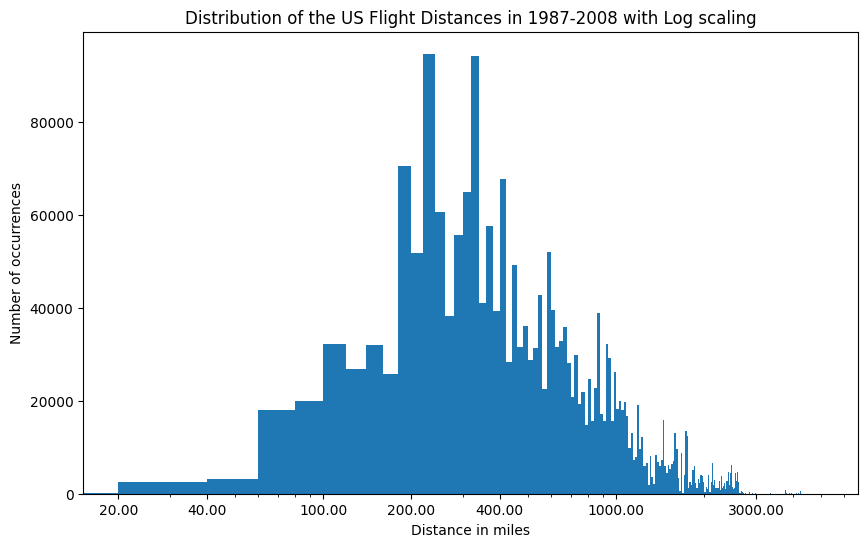

In [4]:
plt.figure(figsize = [10, 6])

bins = np.arange(0, df['Distance'].max() + 100, 20)

plt.hist(x=df['Distance'], bins=bins)

# x-axis log scaling
plt.xscale("log")

# set up the ticks values and names
xtick_values = [20, 40, 100, 200, 400, 1000, 3000]
xtick_names = ['{:0.2f}'.format(value) for value in xtick_values]

# apply the ticks
plt.xticks(ticks=xtick_values, labels=xtick_names)

plt.xlabel("Distance in miles")
plt.ylabel("Number of occurrences")

plt.title("Distribution of the US Flight Distances in 1987-2008 with Log scaling");

## Flight Cancellation Reasons

The relative frequency was used once more to see the occurrences in percentages rather than using their numeric values. We can see that Carrier was the most frequently appeared reason for annulling the flights making up nearly 44%. The weather was also the major one as expected with about 35%. Interestingly enough, the security was the least common reason for cancellation making up only 0.1% by being present only a handful of times.

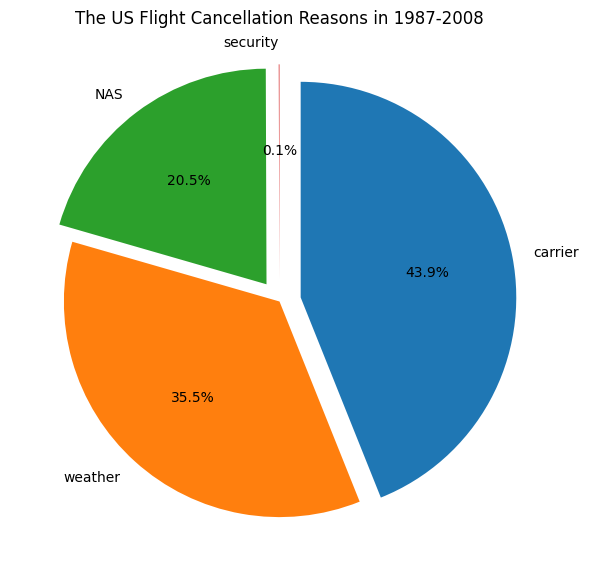

In [5]:
# figure
plt.figure(figsize=[7, 7])

cancel_codes = df["CancellationCode"].value_counts()

# A = carrier, B = weather, C = NAS, D = security
cancel_labels = ['carrier', 'weather', 'NAS', 'security']

# display percentages on the pie plot
plt.pie(cancel_codes, labels=cancel_labels, startangle=90, counterclock=False, autopct='%1.1f%%',
        explode=(0.1, 0, 0.1, 0.1),
        wedgeprops = {"edgecolor" : "white",
                      'linewidth': 0,
                      'antialiased': True})

# title and labels
plt.title("The US Flight Cancellation Reasons in 1987-2008");

## Flight Time Differences and Delay Types

Most of the flights not only departed or arrived later than the scheduled time, but also earlier. This was the reason why negative values occurred on the arrival and departure time entries. The horizontal line was used in the charts to distinguish the lateness and earliness. The logarithmic scaling was applied again to get more information. Although the security was the least common reason for flight annulation, it was the most common one for delays between the 10 to 20 minutes range. Carrier and Weather delays usually lasted much longer than the others which were also the most prominent reasons for cancellation.

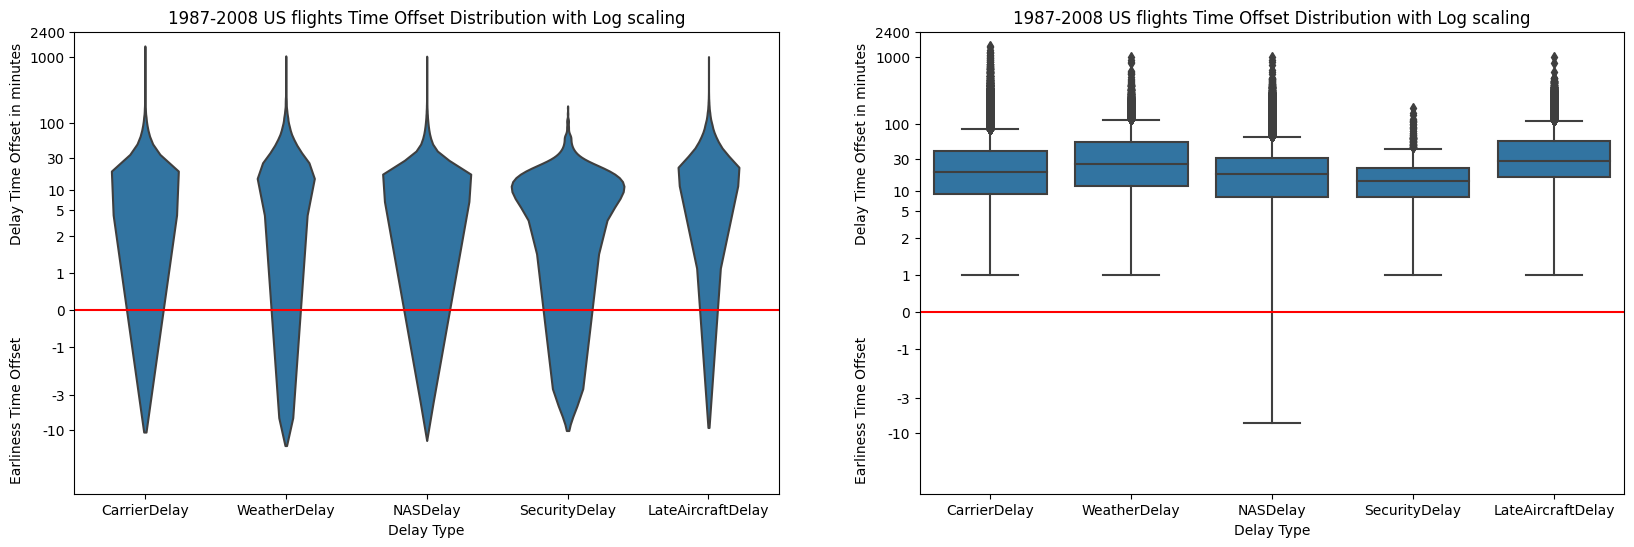

In [6]:
# use the melt function to get columns for delay types and their corresponding latency minutes
delay_types = df.melt(id_vars=['Year'],
                      value_vars=['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
                      var_name="delay_type",
                      value_name="delay_minutes")

delay_types['delay_minutes'] = delay_types['delay_minutes'].apply(lambda x: x if x!= 0.0 else np.nan)
delay_types.dropna(inplace=True)

# function to avoid repeating the label names and tick values
def common_attributes():
    plt.title("1987-2008 US flights Time Offset Distribution with Log scaling")
    plt.xlabel("Delay Type")
    plt.ylabel("Earliness Time Offset                     Delay Time Offset in minutes")

    plt.yscale("symlog")

    plt.axhline(0, color='red')

    ytick_values = [-10, -3, -1, 0, 1, 2, 5, 10, 30, 100, 1000, 2400]
    ytick_names = [str(value) for value in ytick_values]

    plt.yticks(ytick_values, ytick_names)

plt.figure(figsize=(20, 6))

# Subplot 1: Violin plot with log scaling
plt.subplot(1, 2, 1)
sb.violinplot(data=delay_types, x='delay_type', y='delay_minutes', color=base_color, inner=None)

common_attributes()

# Subplot 2: Box plot
plt.subplot(1, 2, 2)
sb.boxplot(data=delay_types, x='delay_type', y='delay_minutes', color=base_color)

common_attributes();

### Flight Hours and Delay Times

To gain insights at this part of the investigation, the mean values of the departure and arrival delays for a specific part of the day were calculated on the scheduled hours' basis. It was possible to see the type of the scheduling and the corresponding tardiness duration. We can see that durations of both departure and arrival hours are equivalently connected to each other. Hence, the increased delays started happening during the evening times reaching the average of 20 minutes while making up about 2-5 minutes in the mornings. The peak times seemed to be between 22:00 and 00:00. However, there was much less lateness traffic between 7:00 and 10:00.

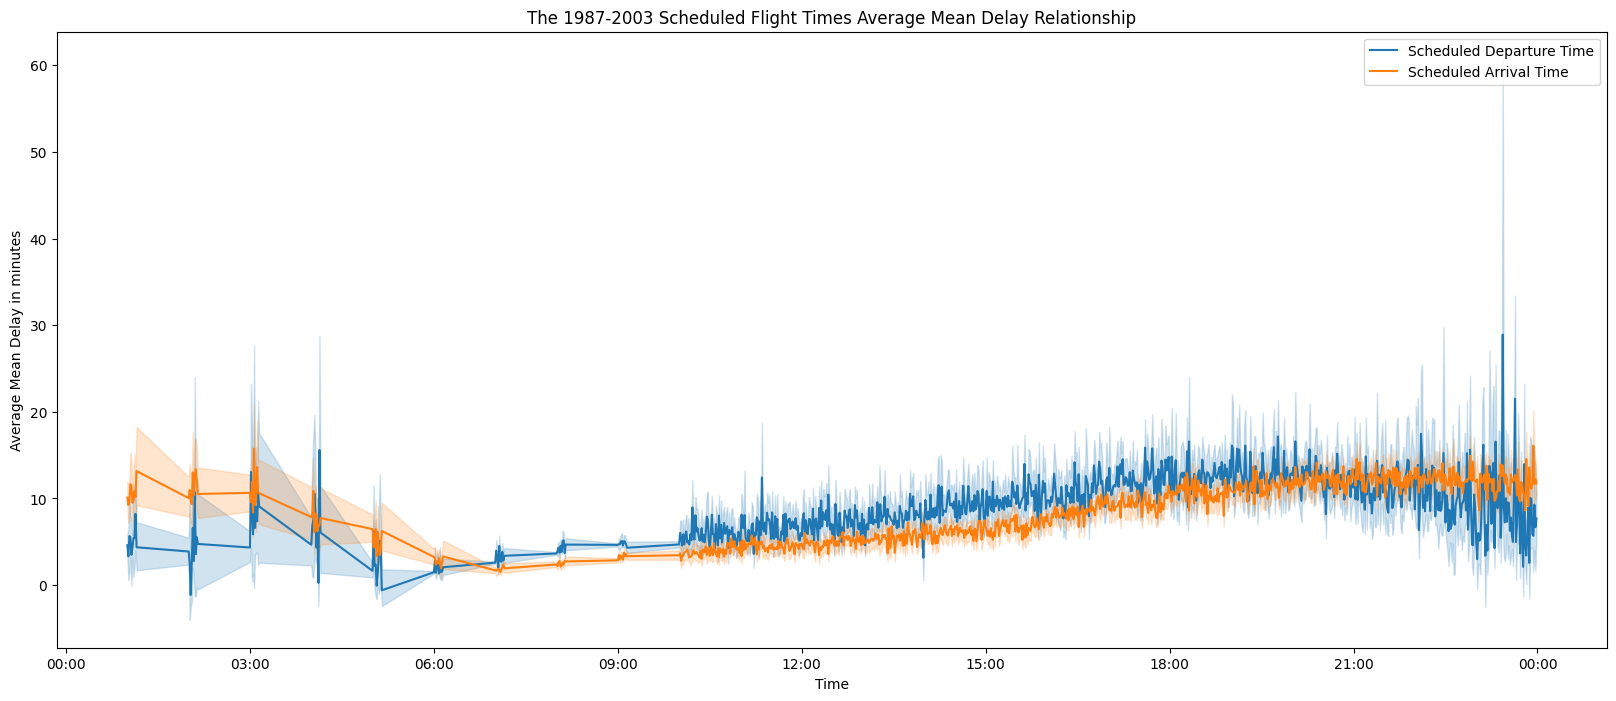

In [7]:
from datetime import time

# custom function
def convert_datetime(str_time: float):
    if pd.isna(str_time):
        return
    str_time = str(round(str_time))
    if len(str_time) == 4:
        hour = str_time[:2]
        minutes = str_time[2:4]
        if int(hour) > 23:
            return np.nan
        hour_minute = time(hour=int(hour), minute=int(minutes))
    elif len(str_time) == 3:
        hour = str_time[:1]
        minutes = str_time[2:3]
        if int(hour) > 23:
            return np.nan
        hour_minute = time(hour=int(hour), minute=int(minutes))
    elif len(str_time) == 2:
        hour = str_time[0]
        minutes = str_time[1]
        if int(hour) > 23:
            return np.nan
        hour_minute = time(hour=int(hour), minute=int(minutes))
    else:
        hour_minute = np.nan
    return hour_minute

# apply the function and change the corresponding data types into datetime
df["DepTime"] = pd.to_datetime(df["DepTime"].apply(convert_datetime), format='%H:%M:%S')
df["ArrTime"] = pd.to_datetime(df["ArrTime"].apply(convert_datetime), format='%H:%M:%S')
df["CRSDepTime"] = pd.to_datetime(df["CRSDepTime"].apply(convert_datetime), format='%H:%M:%S')
df["CRSArrTime"] = pd.to_datetime(df["CRSArrTime"].apply(convert_datetime), format='%H:%M:%S')

# use the melt function to get columns for delay types and their corresponding latency minutes
delay_time_types = df.melt(id_vars=['DepDelay', 'ArrDelay'],
                      value_vars=['CRSDepTime', 'CRSArrTime'],
                      var_name="flight_time_type",
                      value_name="time")

delay_time_types['mean_delay'] = (delay_time_types['DepDelay'] + delay_time_types['ArrDelay']) / 2

from matplotlib.dates import DateFormatter

#  figure
plt.figure(figsize=(20, 8))

# line plot with classified into types
ax = sb.lineplot(data=delay_time_types, x="time", y="mean_delay", hue="flight_time_type")

# change label names
labels = plt.legend()
labels.get_texts()[0].set_text("Scheduled Departure Time")
labels.get_texts()[1].set_text("Scheduled Arrival Time")

# labels and titles

plt.title("The 1987-2003 Scheduled Flight Times Average Mean Delay Relationship")
plt.xlabel("Time")
plt.ylabel("Average Mean Delay in minutes")

# reformat ticks as HH:MM
hh_mm = DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(hh_mm);

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [8]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck.ipynb to slides
[NbConvertApp] Writing 835691 bytes to Part_II_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "C:\Users\hp\AppData\Local\Programs\Python\Python310\Scripts\jupyter-nbconvert.EXE\__main__.py", line 7, in <module>
  File "C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\jupyter_core\application.py", line 285, in launch_instance
    return super().launch_instance(argv=argv, **kwargs)
  File "C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\traitlets\config\application.py", line 1043, i